In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import scipy

Populating the interactive namespace from numpy and matplotlib


##Seccion 12.1

###Ejercicio 1-FFT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


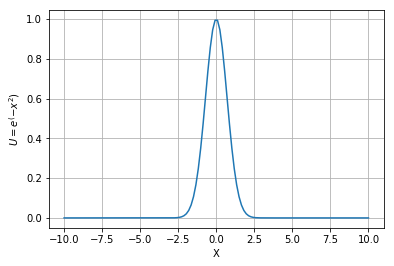

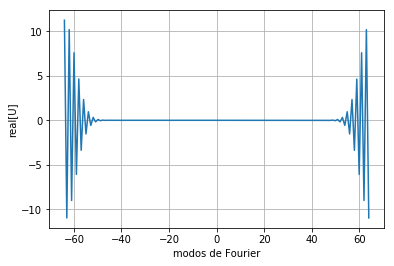

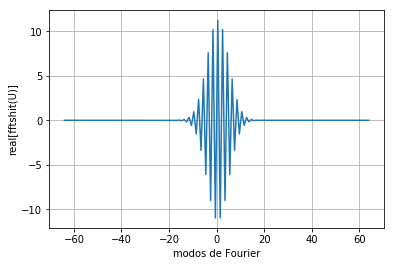

In [63]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n)
x3=np.linspace(-n/2,n/2,n)
x=x2[0:n]
u=np.exp(-x*x)
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

plt.figure(1)
plt.plot(x,u)
plt.grid()
pylab.ylabel("$U=e^(-x^2)$")
pylab.xlabel("X")
plt.show

plt.figure(2)
plt.plot(x3,ut)
pylab.ylabel("real[U]")
pylab.xlabel("modos de Fourier")
plt.grid()
plt.show

plt.figure(3)
plt.plot(x3,utshift)
pylab.ylabel("real[fftshit(U)]")
pylab.xlabel("modos de Fourier")
plt.grid()
plt.show()                 


###Ejercicio 2-FFT vs diferencias finitas

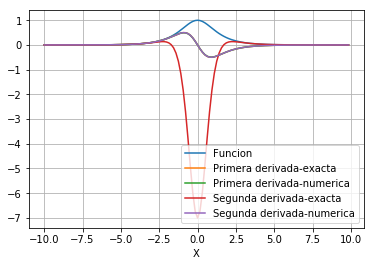

In [80]:

L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=1/np.cosh(x)
ut=np.fft.fft(u)
arr1=np.linspace(0,((n/2)-1),64)
arr2=np.linspace(((-n/2)-1),-1,64)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/L)*arreg


#FFT calculation of derivatives
ut1=1j*k*ut
ut2=-k*k*ut
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=(-1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-((2/np.cosh(x))**3)
#Finite difference calculation of first derivative
#2nd-order accurate
ux=[]
ux.append((-3*u[0]+4*u[1]-u[2]/(2*dx)))
longit=(np.linspace(1,n-2,126)).astype(int)
for j in longit:
 ux.append((u[j+1]-u[j-1])/(2*dx))
ux.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx));

#4th-order accurate
ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
longit2=(np.linspace(2,n-3,124)).astype(int)
for j in longit2:
 ux2.append((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx))
ux2.append((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))      
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.figure(1)
plt.plot(x,u,label='Funcion')
plt.plot(x,u1exact,label='Primera derivada-exacta')
plt.plot(x,ux,label='Primera derivada-numerica')
plt.plot(x,u2exact,label='Segunda derivada-exacta')
plt.plot(x,ux2,label='Segunda derivada-numerica')
pylab.legend(loc='lower right') 
pylab.xlabel("X")
plt.grid()
plt.show()       


##Seccion 12.2

###Ejercicio 1-Señal con ruido

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


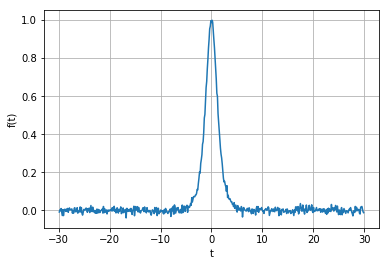

In [81]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
arr1=np.linspace(0,((n/2)-1),256)
arr2=np.linspace(((-n/2)-1),-1,256)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/(2*L))*arreg
u=1/np.cosh(t)
noise=1;
ut=np.fft.fft(u)
utn=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
un=np.fft.ifft(utn)



plt.figure(1)
plt.plot(t[1:],un[1:])
pylab.xlabel("t")
pylab.ylabel("f(t)")
plt.grid()
plt.show()  

###Ejercicio 2-Filtro 

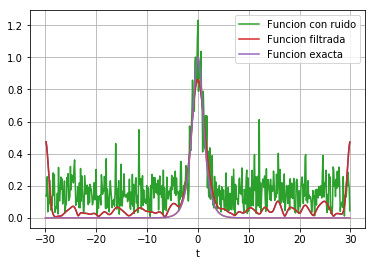

In [84]:
noise=10;
unt=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
un=np.fft.ifft(unt);


fil=np.exp(-0.2*(k)**2);
unft=fil*unt;
unf=ifft(unft);
plot(t[1:],abs(unf)[1:])
plot(t,u)

plt.figure(1)
plot(t[1:],abs(un)[1:],label='Funcion con ruido')
plot(t[1:],abs(unf)[1:],label='Funcion filtrada')
plot(t,u,label='Funcion exacta')
pylab.legend(loc='upper right') 
pylab.xlabel("t")
plt.grid()
plt.show()     


##Seccion 12.2

###Ejercicio 1-Radar

In [ ]:
labels=[’(a)’;’(b)’;’(c)’;’(d)’];
realize=[1,2,5,100];
tamanio=[0,1,2,3]
for jj in tamanio:
 u=1/np.cosh(t); 
 ave=zeros(1,n);
 ut=fft(u);
for j=1:realize(jj)
utn(j,:)=ut+noise*(randn(1,n)+i*randn(1,n));
ave=ave+utn(j,:);

dat(j,:)=abs(fftshift(utn(j,:)))/max(abs(utn(j,:)));
un(j,:)=ifft(utn(j,:));
end
ave=abs(fftshift(ave))/realize(jj);
subplot(4,1,jj)
plot(ks,ave/max(ave),’k’)
set(gca,’Fontsize’,[15])
axis([-20 20 0 1])
text(-18,0.7,labels(jj,:),’Fontsize’,[15])
ylabel(’|fft(u)|’,’Fontsize’,[15])
end
hold on
plot(ks,abs(fftshift(ut))/max(abs(ut)),’k:’,’Linewidth’,[2])
set(gca,’Fontsize’,[15])
xlabel(’frequency (k)’)